In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/final_internship_data.csv')
df

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,er7Luy6J,Morgan Smith,Gabriel Coleman,Bad,rainy,Dense Traffic,2015-05-07 18:45:12.0000004,7.0,2015-05-07 18:45:12,-1.291173,...,5,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706
499996,FWDZu9NA,Dillon Jackson,Larry Richards,Very Good,rainy,Flow Traffic,2010-09-13 12:11:34.0000004,13.7,2010-09-13 12:11:34,-1.291595,...,9,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931
499997,QZIMcpLZ,Michael Rodriguez,Lonnie Santana,Bad,rainy,Flow Traffic,2014-08-25 00:22:20.0000001,25.0,2014-08-25 00:22:20,-1.291262,...,8,0,2014,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251
499998,AD72Uwmn,Deborah Soto,Emily Rivera,Good,stormy,Congested Traffic,2015-01-12 12:17:32.0000001,6.5,2015-01-12 12:17:32,-1.291101,...,1,0,2015,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [ ]:
# @title 1. Data Cleaning
# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [ ]:
# Convert pickup_datetime to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
user_id              0
user_name            0
driver_name          0
car_condition        0
weather              0
traffic_condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64


In [ ]:
null_rows = df[df.isnull().any(axis=1)]
display(null_rows)

,user_id,user_name,driver_name,car_condition,weather,traffic_condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
120227,BOLML7gg,Carol Kim,John Scott,Very Good,rainy,Dense Traffic,2012-12-11 12:57:00.00000013,12.5,2012-12-11 12:57:00,-1.291417,...,12,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245696,AA838qgm,Mark Jones,Christy Taylor,Bad,windy,Dense Traffic,2013-03-21 18:07:07.0000001,86.5,2013-03-21 18:07:07,-1.291397,...,3,3,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340533,BqrlHUr2,Joshua Mullins,Sarah Khan,Excellent,cloudy,Dense Traffic,2012-12-11 12:50:52.00000010,27.5,2012-12-11 12:50:52,-1.291188,...,12,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428108,rL4WTHGq,Richard Brown,Rachel Miller,Very Good,cloudy,Flow Traffic,2011-09-08 09:12:52.0000001,11.8,2011-09-08 09:12:52,-1.291317,...,9,3,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471472,tKIOKS8Y,Larry Wade,Howard Jackson,Good,windy,Congested Traffic,2012-12-11 12:34:20.0000006,7.8,2012-12-11 12:34:20,0.000000,...,12,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop missing rows
df.dropna(inplace=True)

In [ ]:
# Check duplicates
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
         fare_amount                pickup_datetime  pickup_longitude  \
count  499995.000000                         499995     499995.000000   
mean       11.358182  2012-03-20 23:58:38.704932864         -1.265714   
min       -44.900000            2009-01-01 00:31:32        -52.119764   
25%         6.000000     2010-08-19 20:57:34.500000         -1.291405   
50%         8.500000            2012-03-18 19:10:17         -1.291226   
75%        12.500000            2013-10-19 06:23:00         -1.290970   
max       500.000000            2015-06-30 23:38:21         37.360538   
std         9.916069                            NaN          0.206934   

       pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
count    499995.000000      499995.000000     499995.000000    499995.000000   
mean          0.696742          -1.265755          0.696675         1.683445   
min         -54.389440         -59.049665        -44.676047         0.000000   
2

In [ ]:
# Print date range
print("Range of pickup_datetime:")
print("Minimum:", df['pickup_datetime'].min())
print("Maximum:", df['pickup_datetime'].max())

Range of pickup_datetime:
Minimum: 2009-01-01 00:31:32
Maximum: 2015-06-30 23:38:21


In [ ]:
# Fare amount range
fare_min = df['fare_amount'].min()
fare_max = df['fare_amount'].max()
print(f"\nFare Amount Range: ${fare_min:.2f} to ${fare_max:.2f}")


Fare Amount Range: $-44.90 to $500.00


In [ ]:
# @title 2. Check Outlier
# --- IQR and bounds from current df['fare_amount'] ---
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")

# Save original fare column before modification
fare_before = df['fare_amount'].copy()

# Count number of outliers before handling
num_outliers_before = ((fare_before < lower_bound) | (fare_before > upper_bound)).sum()
print(f"Number of outliers before handling: {num_outliers_before}")

Q1: 6.00
Q3: 12.50
IQR: 6.50
Lower Bound: -3.75
Upper Bound: 22.25
Number of outliers before handling: 43329


In [ ]:
# --- Outlier Handling ---
# Optional: Remove negative fares (common preprocessing)
df = df[df['fare_amount'] >= 0]

# Remove outliers based on IQR bounds
df = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]
print("\nOutliers removed from fare_amount")

# Count number of outliers after handling
num_outliers_after = ((df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound)).sum()
print(f"Number of outliers after handling: {num_outliers_after}")

# --- Set same x and y limits ---
# Determine full x range from original and cleaned data
x_limit = (0, max(fare_before.max(), df['fare_amount'].max(), 100))

# Compute common y-axis max for histograms
hist_before = np.histogram(fare_before[fare_before >= 0], bins=50)
hist_after = np.histogram(df['fare_amount'], bins=50)
y_limit_hist = (0, max(hist_before[0].max(), hist_after[0].max()))


Outliers removed from fare_amount
Number of outliers after handling: 0


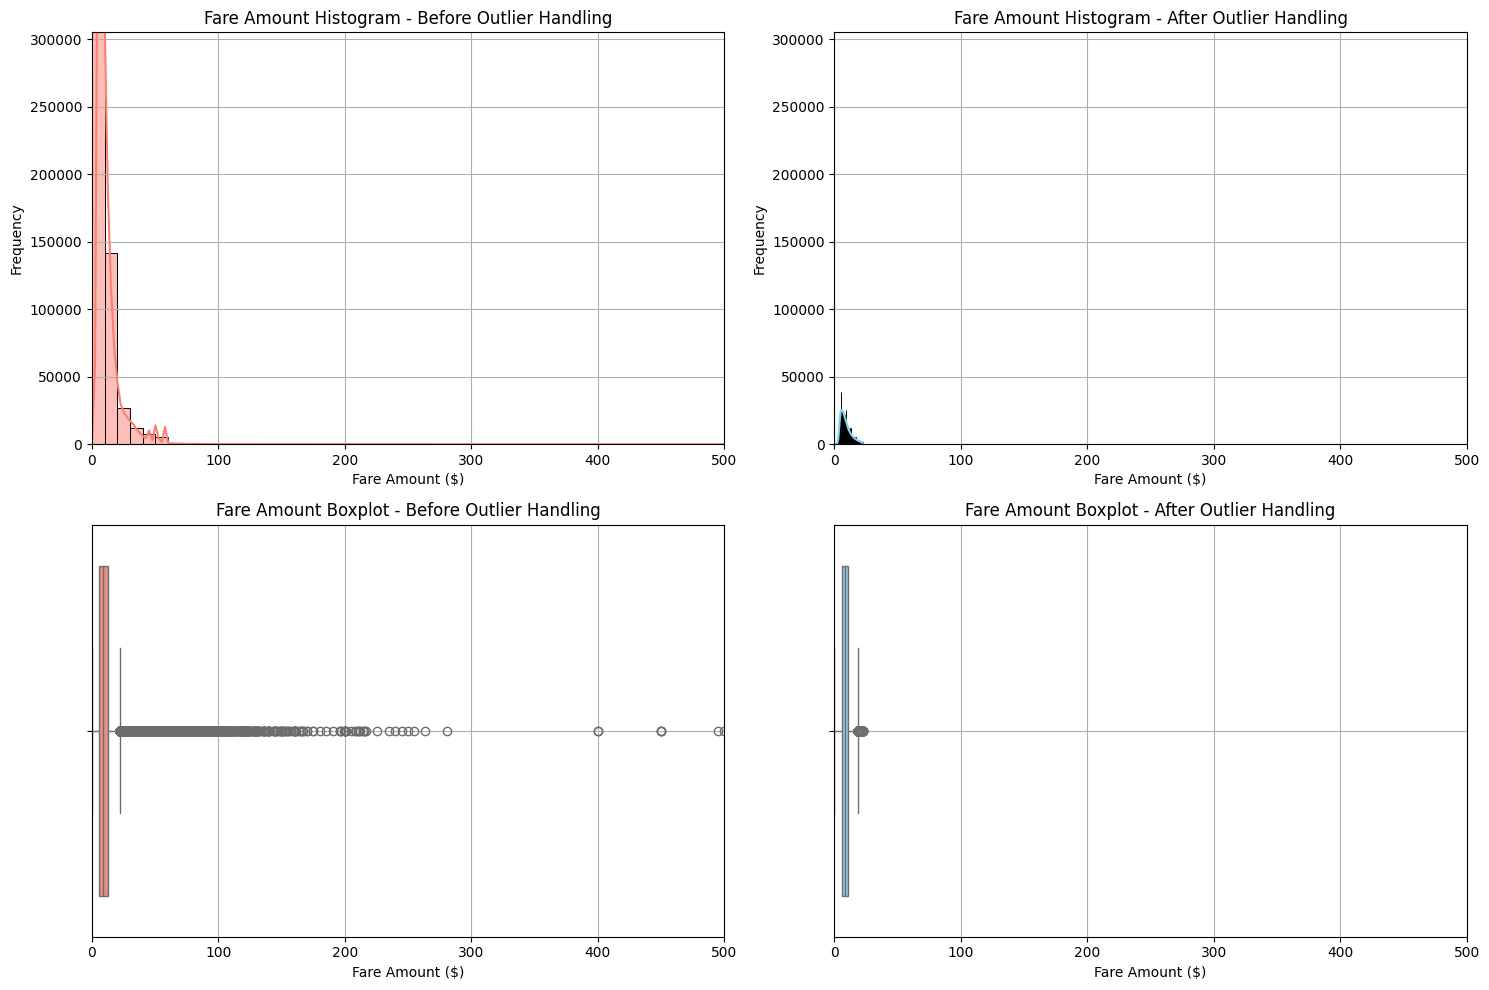

In [ ]:
# --- Plotting ---
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram BEFORE
sns.histplot(fare_before[fare_before >= 0], bins=50, ax=axes[0, 0], color='salmon', kde=True)
axes[0, 0].set_title("Fare Amount Histogram - Before Outlier Handling")
axes[0, 0].set_xlabel("Fare Amount ($)")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_xlim(x_limit)
axes[0, 0].set_ylim(y_limit_hist)
axes[0, 0].grid(True)

# Boxplot BEFORE
sns.boxplot(x=fare_before[fare_before >= 0], ax=axes[1, 0], color='salmon')
axes[1, 0].set_title("Fare Amount Boxplot - Before Outlier Handling")
axes[1, 0].set_xlabel("Fare Amount ($)")
axes[1, 0].set_xlim(x_limit)
axes[1, 0].grid(True)

# Histogram AFTER
sns.histplot(df['fare_amount'], bins=50, ax=axes[0, 1], color='skyblue', kde=True)
axes[0, 1].set_title("Fare Amount Histogram - After Outlier Handling")
axes[0, 1].set_xlabel("Fare Amount ($)")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_xlim(x_limit)
axes[0, 1].set_ylim(y_limit_hist)
axes[0, 1].grid(True)

# Boxplot AFTER
sns.boxplot(x=df['fare_amount'], ax=axes[1, 1], color='skyblue')
axes[1, 1].set_title("Fare Amount Boxplot - After Outlier Handling")
axes[1, 1].set_xlabel("Fare Amount ($)")
axes[1, 1].set_xlim(x_limit)
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# @title 3. Feature Engineering
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year
df['weekday'] = df['pickup_datetime'].dt.day_name()
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday']).astype(int)
df['fare_per_km'] = df['fare_amount'] / (df['distance'] + 1e-5)

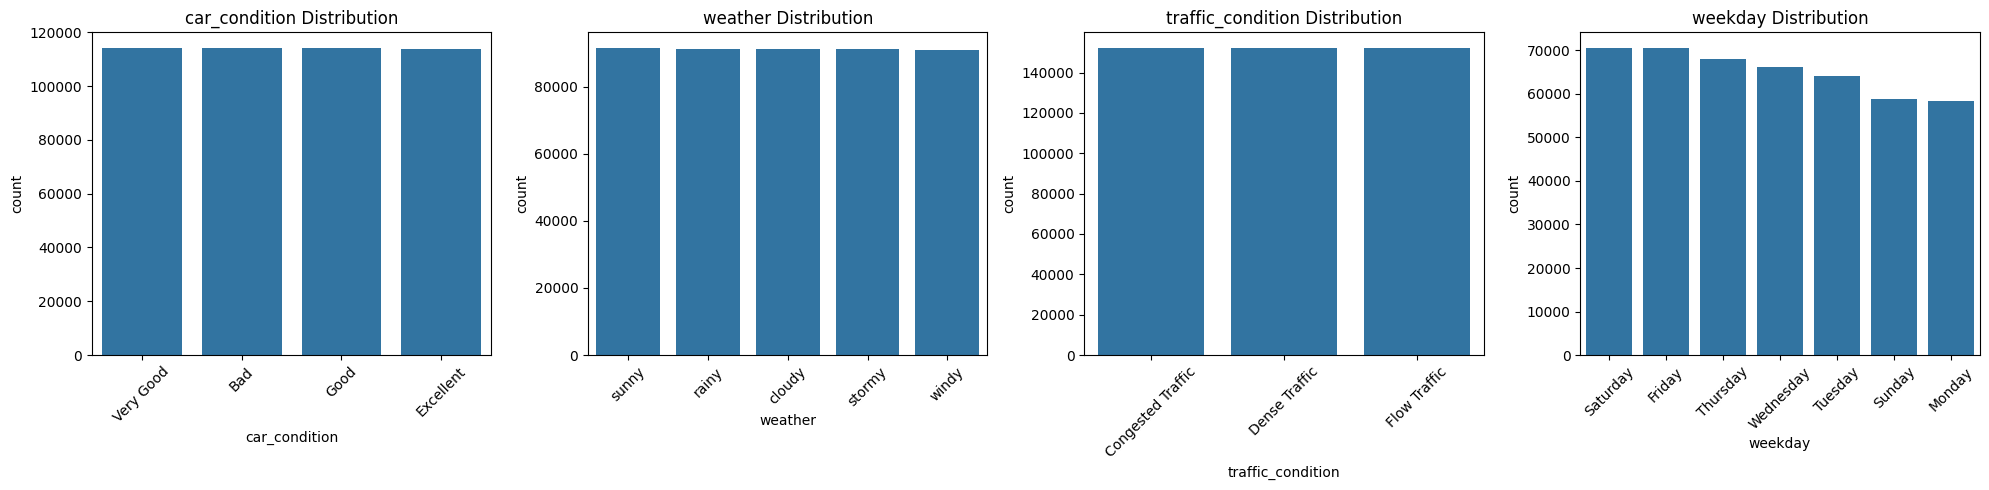

In [ ]:
# @title 4. Univariate Analysis (Categorical)
categorical_columns = ['car_condition', 'weather', 'traffic_condition', 'weekday']
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(20, 5))
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

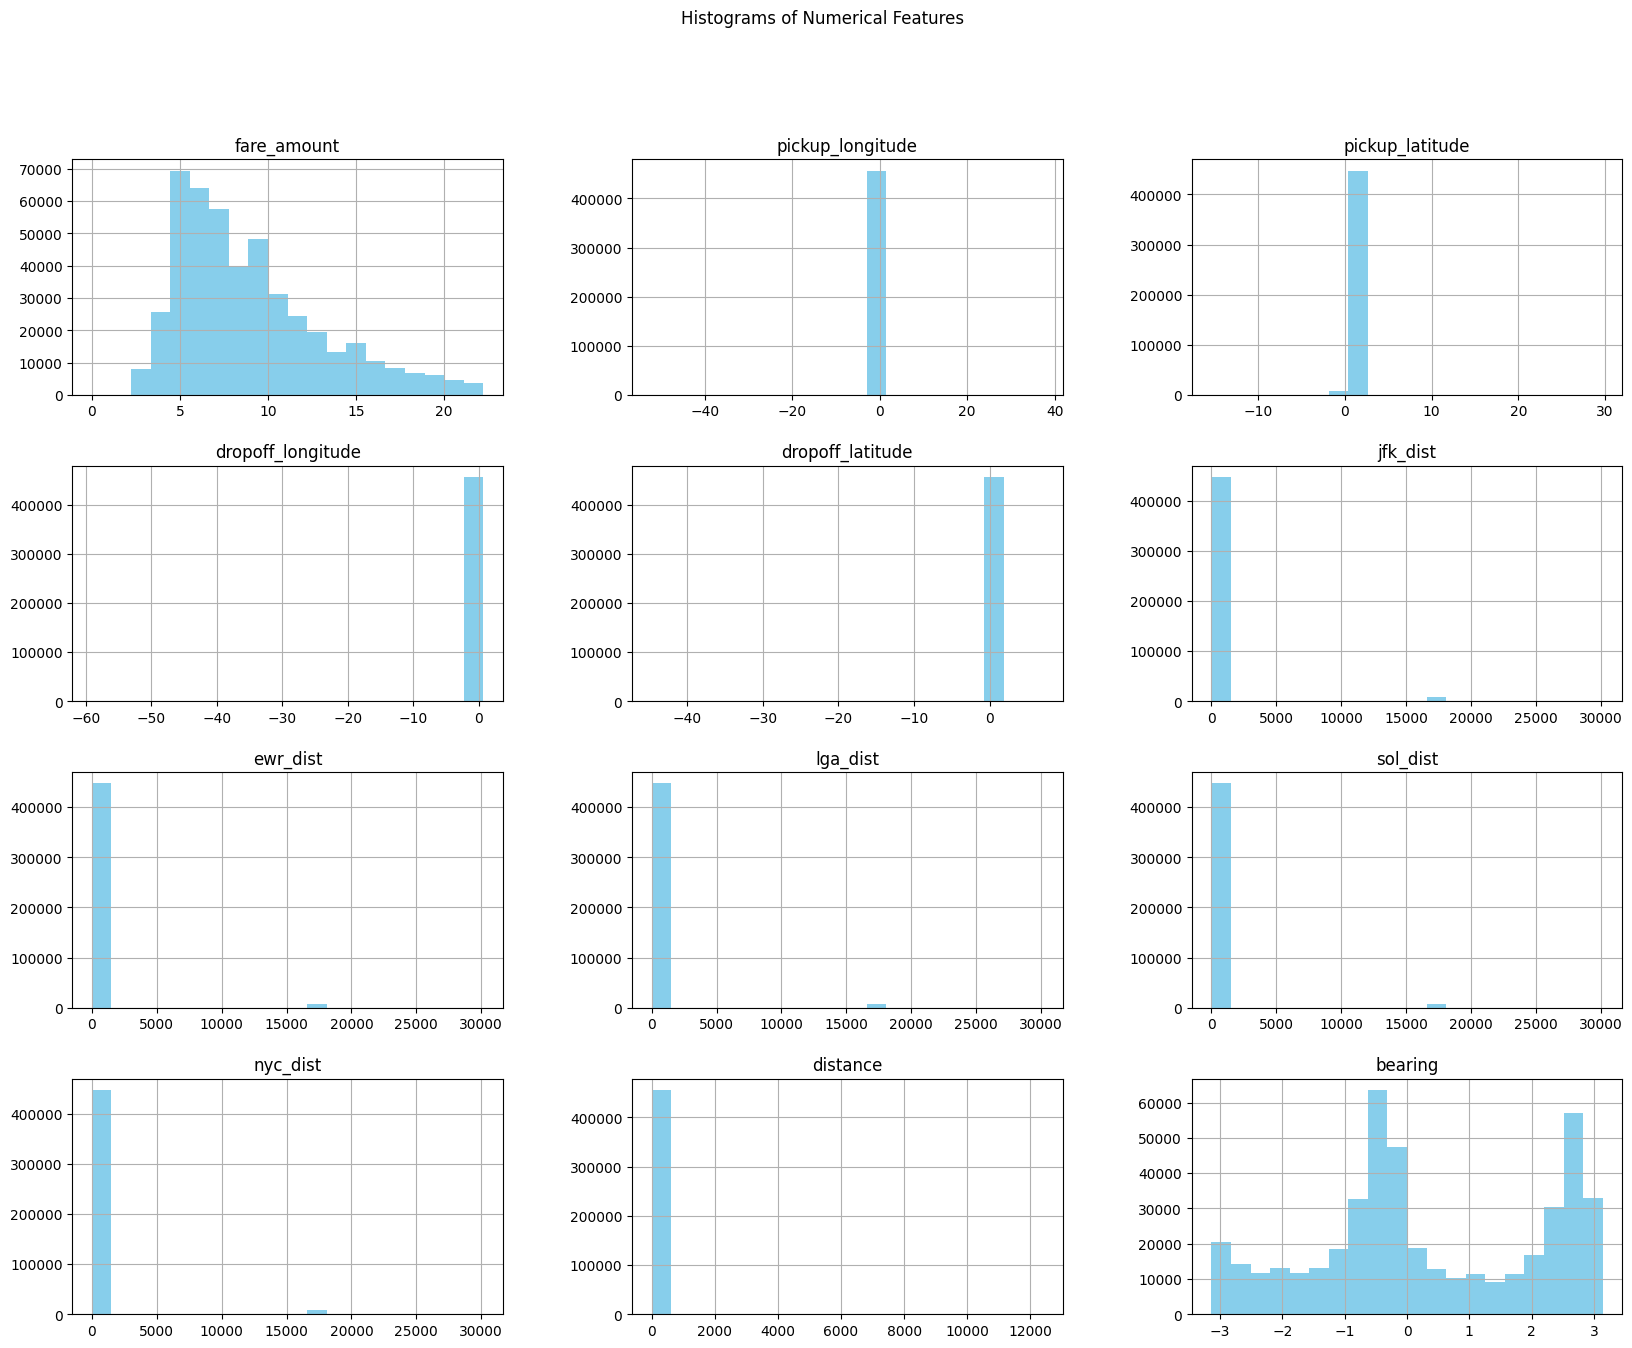

In [ ]:
# @title 5. Univariate Analysis (Numerical)
numerical_columns = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
                     'dropoff_latitude', 'jfk_dist', 'ewr_dist', 'lga_dist',
                     'sol_dist', 'nyc_dist', 'distance', 'bearing']
df[numerical_columns].hist(bins=20, figsize=(20, 15), color='skyblue')
plt.suptitle("Histograms of Numerical Features")
plt.show()


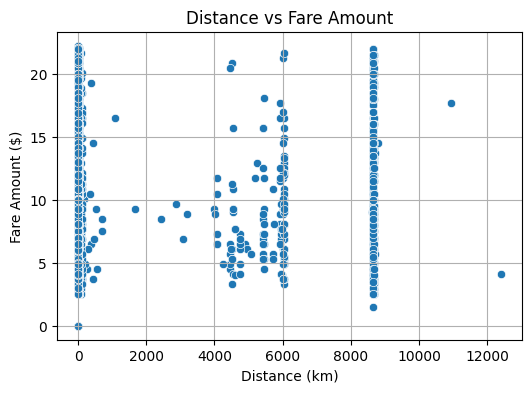

In [ ]:
# @title 6. Bivariate Analysis: Numerical vs Numerical
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='distance', y='fare_amount')
plt.title('Distance vs Fare Amount')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

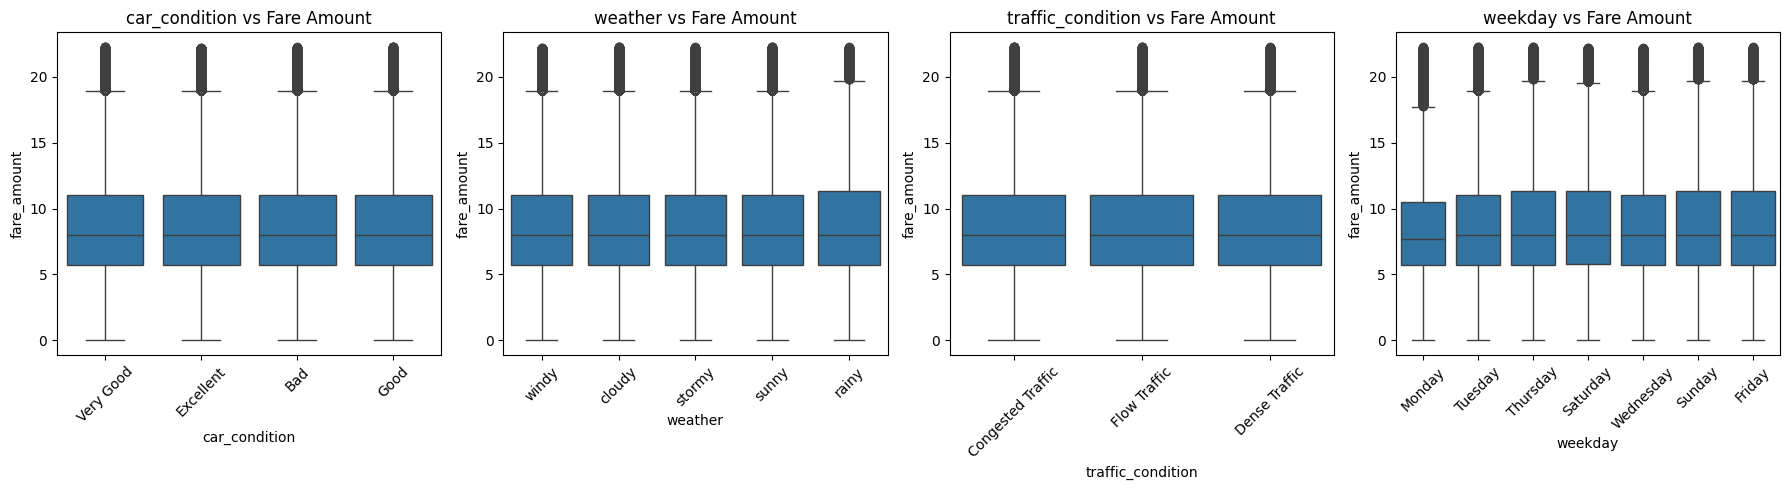

In [ ]:
# @title 7. Bivariate Analysis: Categorical vs Fare (Box Plots)
boxplot_columns = ['car_condition', 'weather', 'traffic_condition', 'weekday']
fig, axes = plt.subplots(1, len(boxplot_columns), figsize=(18, 5))
for i, col in enumerate(boxplot_columns):
    sns.boxplot(data=df, x=col, y='fare_amount', ax=axes[i])
    axes[i].set_title(f'{col} vs Fare Amount')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

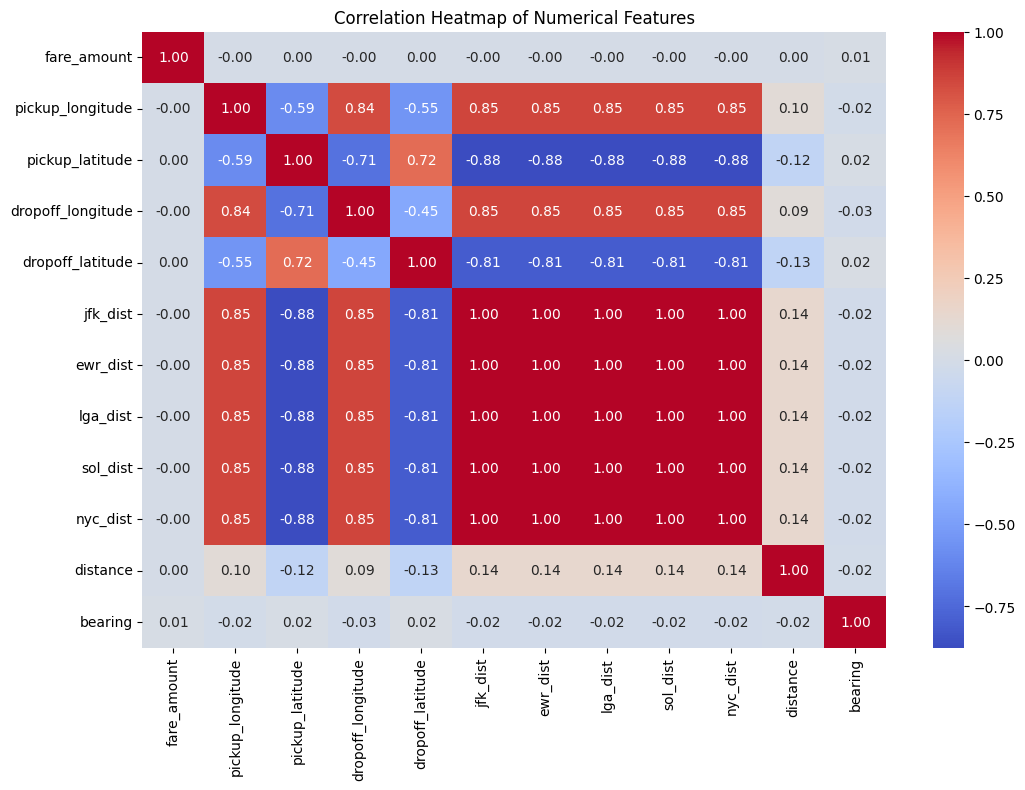

In [ ]:
# @title 8. Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df[numerical_columns].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

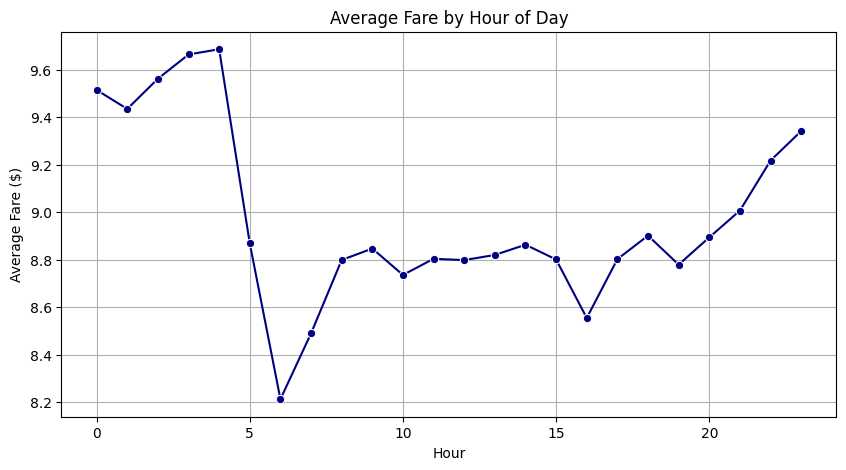

In [ ]:
# @title 9. Insights
# Average Fare by Hour
hourly_fare = df.groupby('hour')['fare_amount'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_fare, x='hour', y='fare_amount', marker='o', color='navy')
plt.title('Average Fare by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.show()

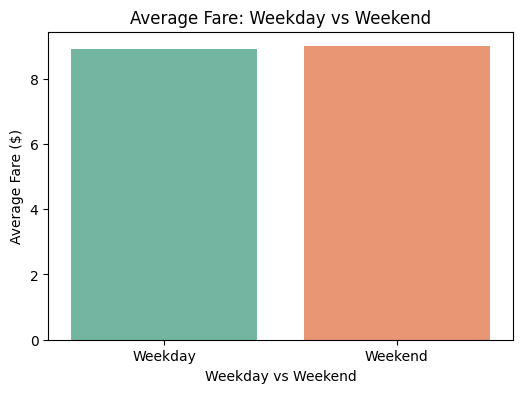

In [ ]:
# Average Fare by Weekday vs Weekend
weekend_fare = df.groupby('is_weekend')['fare_amount'].mean().reset_index()
weekend_fare['label'] = weekend_fare['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})

plt.figure(figsize=(6, 4))
sns.barplot(data=weekend_fare, x='label', y='fare_amount', palette='Set2', hue='label')
plt.xlabel('Weekday vs Weekend')
plt.title('Average Fare: Weekday vs Weekend')
plt.ylabel('Average Fare ($)')
plt.show()

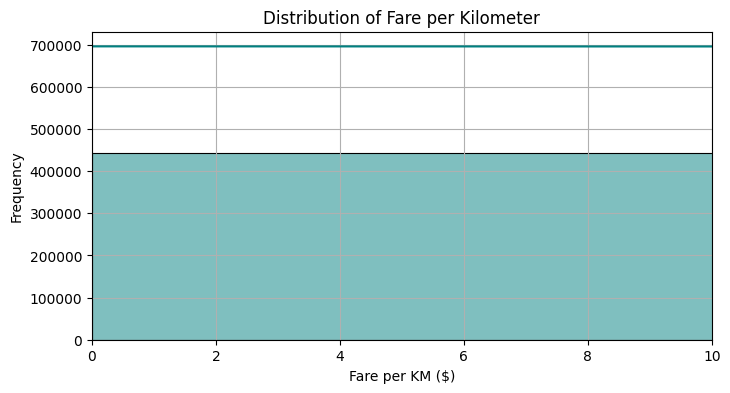

In [ ]:
# Distribution of Fare per Kilometer
plt.figure(figsize=(8, 4))
sns.histplot(df['fare_per_km'], bins=50, color='teal', kde=True)
plt.title('Distribution of Fare per Kilometer')
plt.xlabel('Fare per KM ($)')
plt.ylabel('Frequency')
plt.xlim(0, 10)
plt.grid(True)
plt.show()